# z2z Metadata analysis

Analysis of z2z metadata

By Isthmus // Mitchell P. Krawiec-Thayer

## Import Libraries
(if you have any issues with the next cell, run `pip install -r requirements.txt` to install dependencies)

In [1]:
import isthmuslib as isli
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import numpy as np

## Set parameters

In [2]:
data_file_path = os.path.join(os.path.curdir,'..','data','version_controlled')
data_file_name = 'z2z.csv'

## Import data

Load from file

In [3]:
df = pd.read_csv(os.path.join(data_file_path, data_file_name))
df.head()

,hash,version,lock_time,block_number,input_count,output_count,is_coinbase,fee
0,94f1ec563b081c63503766691912aa75182ea2e991fd2f...,4,0,1278214,1,0,False,1000
1,f2e6897bcb708b97da945cf141468f8bf89d94606d1ad2...,4,0,1278209,1,0,False,1000
2,2bd7e5f7a66b8c78dbcfafdd1681aba24630e7bc0cf045...,4,0,1278207,1,0,False,1000
3,38ae545e0a5f35a428d719f4584c032b33fbded0bca9af...,4,0,1278203,1,0,False,1000
4,75e8c1c9a9b4125591e5bfa70e6acebdbd900da027deca...,4,0,1278195,1,0,False,1000


## Quick feature engineering

In [4]:
df['fee_ZEC'] = df['fee']/1e8
df.describe()

,version,lock_time,block_number,input_count,output_count,fee,fee_ZEC
count,172869.000000,172869.0,1.728690e+05,172869.000000,172869.0,1.728690e+05,172869.000000
mean,3.851194,0.0,8.738386e+05,0.987036,0.0,6.853011e+03,0.000069
std,0.506112,0.0,2.727731e+05,0.114186,0.0,9.796870e+03,0.000098
min,2.000000,0.0,5.260000e+02,0.000000,0.0,0.000000e+00,0.000000
25%,4.000000,0.0,7.663800e+05,1.000000,0.0,1.000000e+03,0.000010
50%,4.000000,0.0,9.627820e+05,1.000000,0.0,1.000000e+04,0.000100
75%,4.000000,0.0,1.079528e+06,1.000000,0.0,1.000000e+04,0.000100
max,4.000000,0.0,1.278214e+06,4.000000,0.0,1.700000e+06,0.017000


## Data visualizations

### Histograms

Single variable

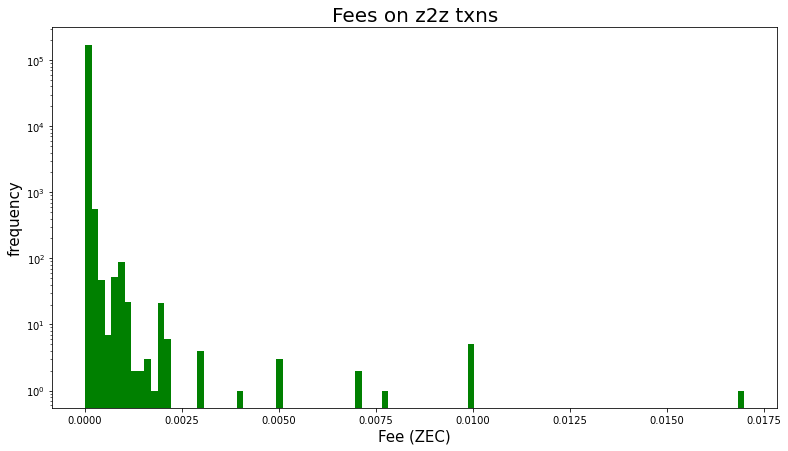

In [5]:
isli.hist(df['fee_ZEC'], xlabel='Fee (ZEC)', title='Fees on z2z txns', bins=100, yscale='log');

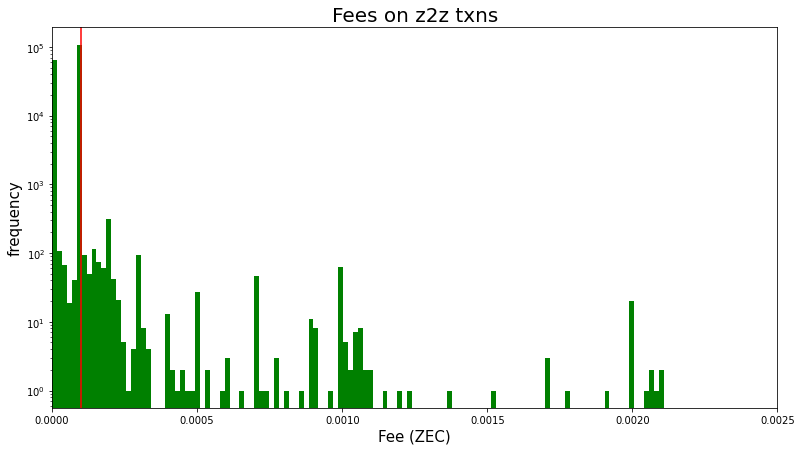

In [6]:
isli.hist(df['fee_ZEC'], xlabel='Fee (ZEC)', title='Fees on z2z txns', bins=1000, yscale='log');
plt.xlim([0,0.0025])
plt.axvline(x=0.0001, color='red');

### Scatter plots

With markers

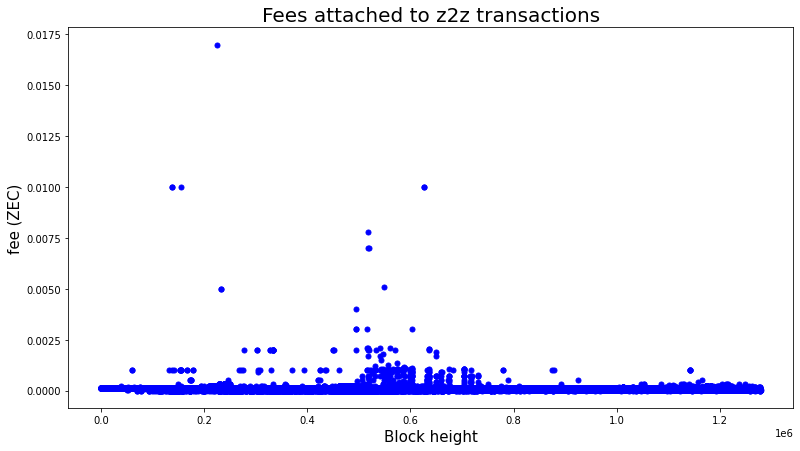

In [7]:
isli.scatter(df['block_number'], df['fee_ZEC'], markersize=25, xlabel='Block height', ylabel='fee (ZEC)', markercolor='blue',title='Fees attached to z2z transactions');

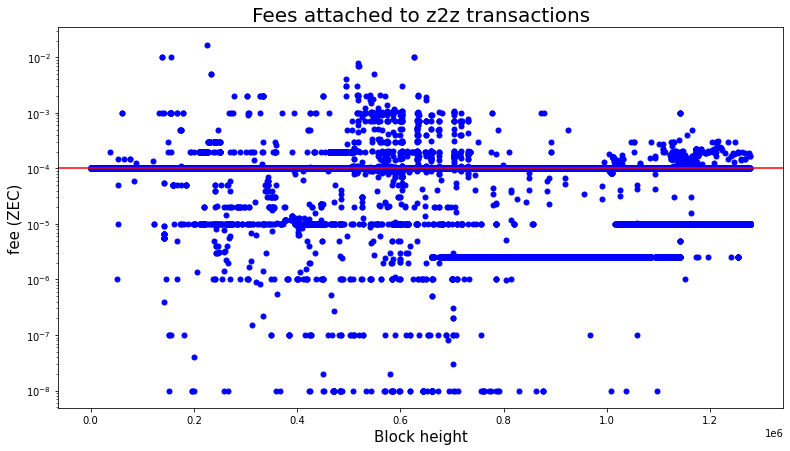

In [8]:
isli.scatter(df['block_number'], df['fee_ZEC'], markersize=25, xlabel='Block height', ylabel='fee (ZEC)', markercolor='blue', yscale='log', title='Fees attached to z2z transactions');
plt.axhline(y=0.0001, color='red');